# A minimal example of HMM
Jitao David Zhang, October 2022

/tmp/ipykernel_7232/2217937341.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_7232/2217937341.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_7232/2217937341.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


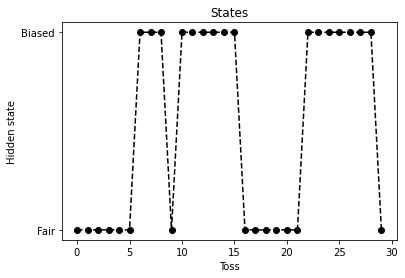

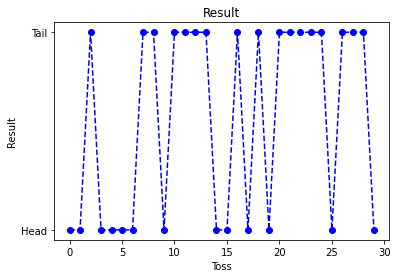

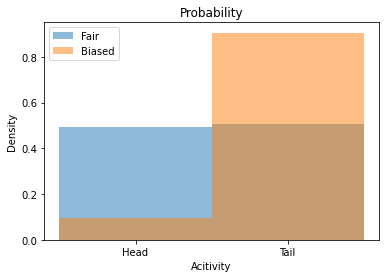

In [62]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

gen_model = hmm.CategoricalHMM(n_components=2, random_state=144)

gen_model.startprob_ = np.array([0.9, 0.1])

gen_model.transmat_ = np.array([[0.8, 0.2],
                                [0.2, 0.8]])

gen_model.emissionprob_ = \
    np.array([[0.5, 0.5],
              [0.1, 0.9]])

acts, gen_states = gen_model.sample(1000, random_state=125)

# plot states over time, let's just look at the first acts for clarity
fig, ax = plt.subplots()
ax.plot(gen_states[:30], 'ko--')
ax.set_title('States')
ax.set_xlabel('Toss')
ax.set_ylabel('Hidden state')
ax.set_yticks([0,1])
ax.set_yticklabels(['Fair', 'Biased'])
fig.show()

fig, ax = plt.subplots()
ax.plot(acts.flatten()[:30], 'bo--')
ax.set_title('Result')
ax.set_yticks([0,1])
ax.set_yticklabels(['Head', 'Tail'])
ax.set_xlabel('Toss')
ax.set_ylabel('Result')
fig.show()

fig, ax = plt.subplots()
ax.hist(acts[gen_states == 0], label='Fair', alpha=0.5,
        bins=np.arange(3) - 0.5, density=True, stacked=True)
ax.hist(acts[gen_states == 1], label='Biased', alpha=0.5,
        bins=np.arange(3) - 0.5, density=True, stacked=True)
ax.set_title('Probability')
ax.set_xticks([0,1])
ax.set_xticklabels(['Head', 'Tail'])
ax.set_xlabel('Acitivity')
ax.set_ylabel('Density')
ax.legend()
fig.show()



In [63]:
print(gen_states[:30])

[0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0]


In [59]:
print(acts.flatten()[:30])

[0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0]


In [65]:
# %%
# Now, let's see if we can recover our hidden states, transmission matrix
# and emission probabilities.

# split our data into training and validation sets (50/50 split)
X_train = acts[:acts.shape[0] // 2]
X_validate = acts[acts.shape[0] // 2:]

# check optimal score
gen_score = gen_model.score(X_validate)

best_score = best_model = None
n_fits = 100
np.random.seed(13)
for idx in range(n_fits):
    model = hmm.CategoricalHMM(
        n_components=2, random_state=idx,
        init_params='se')  # don't init transition, set it below
    # we need to initialize with random transition matrix probabilities
    # because the default is an even likelihood transition
    model.transmat_ = np.array([np.random.dirichlet([0.5, 0.5]),
                                np.random.dirichlet([0.5, 0.5])])
    model.fit(X_train)
    score = model.score(X_validate)
    print(f'Model #{idx}\tScore: {score}')
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

print(f'Generated score: {gen_score}\nBest score:      {best_score}')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = best_model.predict(acts)

print(f'Transmission Matrix Generated:\n{gen_model.transmat_.round(3)}\n\n'
      f'Transmission Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')

print(f'Emission Matrix Generated:\n{gen_model.emissionprob_.round(3)}\n\n'
      f'Emission Matrix Recovered:\n{best_model.emissionprob_.round(3)}\n\n')

# In this case, we were able to get moderately good estimates of the transition and
# emission matrices, but decoding the states was imperfect.



Model #0	Score: -311.02232810511066
Model #1	Score: -311.0045295070107
Model #2	Score: -318.81209755407764
Model #3	Score: -311.1942506686564
Model #4	Score: -311.52041127395864
Model #5	Score: -310.9629122017306
Model #6	Score: -311.5459721005539
Model #7	Score: -308.0793080760234
Model #8	Score: -306.13426284374026
Model #9	Score: -305.46172225575083
Model #10	Score: -310.57120098360036
Model #11	Score: -306.1918229267266
Model #12	Score: -311.1224761395979
Model #13	Score: -311.6647930381189
Model #14	Score: -312.9754023022215
Model #15	Score: -312.1193416904618
Model #16	Score: -306.457045687722
Model #17	Score: -306.70037176189453
Model #18	Score: -311.5712127722532
Model #19	Score: -306.405004902418
Model #20	Score: -310.9456495340524
Model #21	Score: -312.13895864964934
Model #22	Score: -311.1982726191287
Model #23	Score: -311.85013142204787
Model #24	Score: -310.9478025436497
Model #25	Score: -308.84991825142146
Model #26	Score: -310.7577854776238
Model #27	Score: -311.44354097